# The Machine Learning Framework:

By the end of this assignment, I hope you begin to feel like a real data scientist. 

For your assignment I have obtained a dataset of 3333 records of cell phone user data. Your mission -should you choose to accept it- is to train a model that can predict whether or not a user "churns" -cancels their plan at the end of the month. 

The purpose of this assignment is for you to familiarize yourself with what we call **The Machine Learning Framework**:

![The Machine Learning Framework](http://www.ryanleeallred.com/wp-content/uploads/2018/05/machine-learning-framework-1.png)

This will be one of your first opportunities to go from A-Z on a project. What's exciting about this assignment is that you are free to do whatever you think will get you the best performing classifier using the Machine Learning Framework as a guide. 

What is also exciting about this assignment is that we will be using a private Kaggle competition to score your models!

## The Process: 

**You shouldn't just go through the cycle pictured above just once.**

Start off by doing what seems like the *bare minimum* in order to train your classifier and make predictions that are slightly better than random. As you explore the data, make a note of ways that you can improve your model. Then, after you have made your first-pass predictions, prioritize your list of improvements based on their difficulty and estimated value. Each time you make an improvement, re-train and re-validate your model to see if your changes have truly made your classifier better. 

As you go through this cycle of improving your data/model and validating your improvements, your predictions will get better and better until you simply run out of time to make more improvements.  


## Business Understanding

Gaining domain knowledge and a business understanding about a problem is extremely useful. It wil help you communicate your findings to stakeholders and give you insights about the data exploration process.

[What is churn analysis?](https://www.datascience.com/blog/what-is-a-churn-analysis-and-why-is-it-valuable-for-business)

[The importance of predicting customer churn ](https://www.optimove.com/learning-center/customer-churn-prediction-and-prevention)

## The Data:

You will have access to a randomly selected 66.66% of the data for your training dataset. This will have all of the columns **including** whether or not the customer churned. The other 33.33% will be in the test dataset **without** any information about the customer churn. You will run experiments on the training dataset, but ultimately will be required to make predictions and submissions to our private Kaggle Leaderboard using the test dataset.

## [Access the data and the Kaggle leaderboard here](https://www.kaggle.com/t/148ead80810e46ae8383517a543756dd)

**You are going to need to create an account on Kaggle if you don't already have one.**

In [0]:
!pip install cmake
!pip install fancyimpute
!pip install imblearn
!pip install scikit-plot

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from fancyimpute import KNN
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from scikitplot.metrics import plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from statsmodels.imputation.mice import MICEData as md
from sklearn.preprocessing import RobustScaler, normalize
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

    100% |████████████████████████████████| 17.7MB 610kB/s 
    100% |████████████████████████████████| 51kB 3.4MB/s 
    100% |████████████████████████████████| 901kB 8.0MB/s 
    100% |████████████████████████████████| 61kB 19.2MB/s 
    100% |████████████████████████████████| 153kB 9.9MB/s 
    100% |████████████████████████████████| 122kB 13.2MB/s 
    100% |████████████████████████████████| 143kB 14.8MB/s 
    100% |████████████████████████████████| 1.4MB 11.1MB/s 
  Running setup.py bdist_wheel for cvxpy ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done
  Stored in directory: /root/.cache/pip/wheels/09/60/30/d00fe785debdf250b405f987ed563099f27eac69127acf66d1
  Running setup.py bdist_wheel for np-utils ... - done
  Stored in directory: /root/.cache/pip/wheels/f6/2f/39/57e6dd40ac49b4824c1b4430aea787b3397a4a3f389ec56dfb
  Running setup.py bdist_wheel for knnimpute ... - \ don

Using TensorFlow backend.


# ----------------------------------- FIRST -------------------------------------

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/churn-data/master/train.csv")

y = list(df['churn'].values)
y_hat = [0 for i in range(len(df))]

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/churn-data/master/train.csv")
df = df.drop(['id', 'phone', 'area_code', 'state'], axis = 1)
print(df.shape)
# convert 'yes', 'no' to 1, 0
df = df.applymap(lambda x: 1 if x == 'yes' else x)
df = df.applymap(lambda x: 0 if x == 'no' else x)
    
# replace '?' with column median
df['churn'].value_counts()

df0 = df[df['churn']==0].copy()
df1 = df[df['churn']==1].copy()

for c in df.columns:
  df[c] = df[c].replace('?', np.median([float(x)  for x in list(df[c].values) if str(x).isnumeric()]))


# df_extra_1s = df[df['churn']==1]
# df = df.append(df_extra_1s)
# df = df.append(df_extra_1s)
# df = df.append(df_extra_1s)
# df = df.append(df_extra_1s)
# df = df.append(df_extra_1s)  

df = df.apply(pd.to_numeric)  
df.head()

df['churn'].value_counts()

(2222, 18)


0    1897
1     325
Name: churn, dtype: int64

In [0]:
df.head()

,account_length,international_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,churn
0,100,1.0,0.0,0,107.2,98,18.22,86.8,122.0,7.38,156.2,117,7.03,9.7,4.0,2.62,1,0
1,146,0.0,1.0,23,149.6,96,25.43,239.8,124.0,20.38,293.5,135,13.21,7.4,4.0,2.00,2,0
2,84,0.0,0.0,0,159.0,80,27.03,167.9,128.0,14.27,167.6,101,7.54,12.3,5.0,3.32,1,0
3,43,0.0,0.0,0,135.8,125,23.09,163.2,88.0,13.87,229.8,106,10.34,12.6,4.0,3.40,0,0
4,101,0.0,0.0,0,193.7,108,32.93,186.6,100.0,15.86,223.0,100,8.00,11.6,8.0,3.13,0,0



## Data Understanding

Do whatever exploratory data analysis you need to do in order to be educated about what's in this dataset. You're going to need some graphs at the bare minimum.

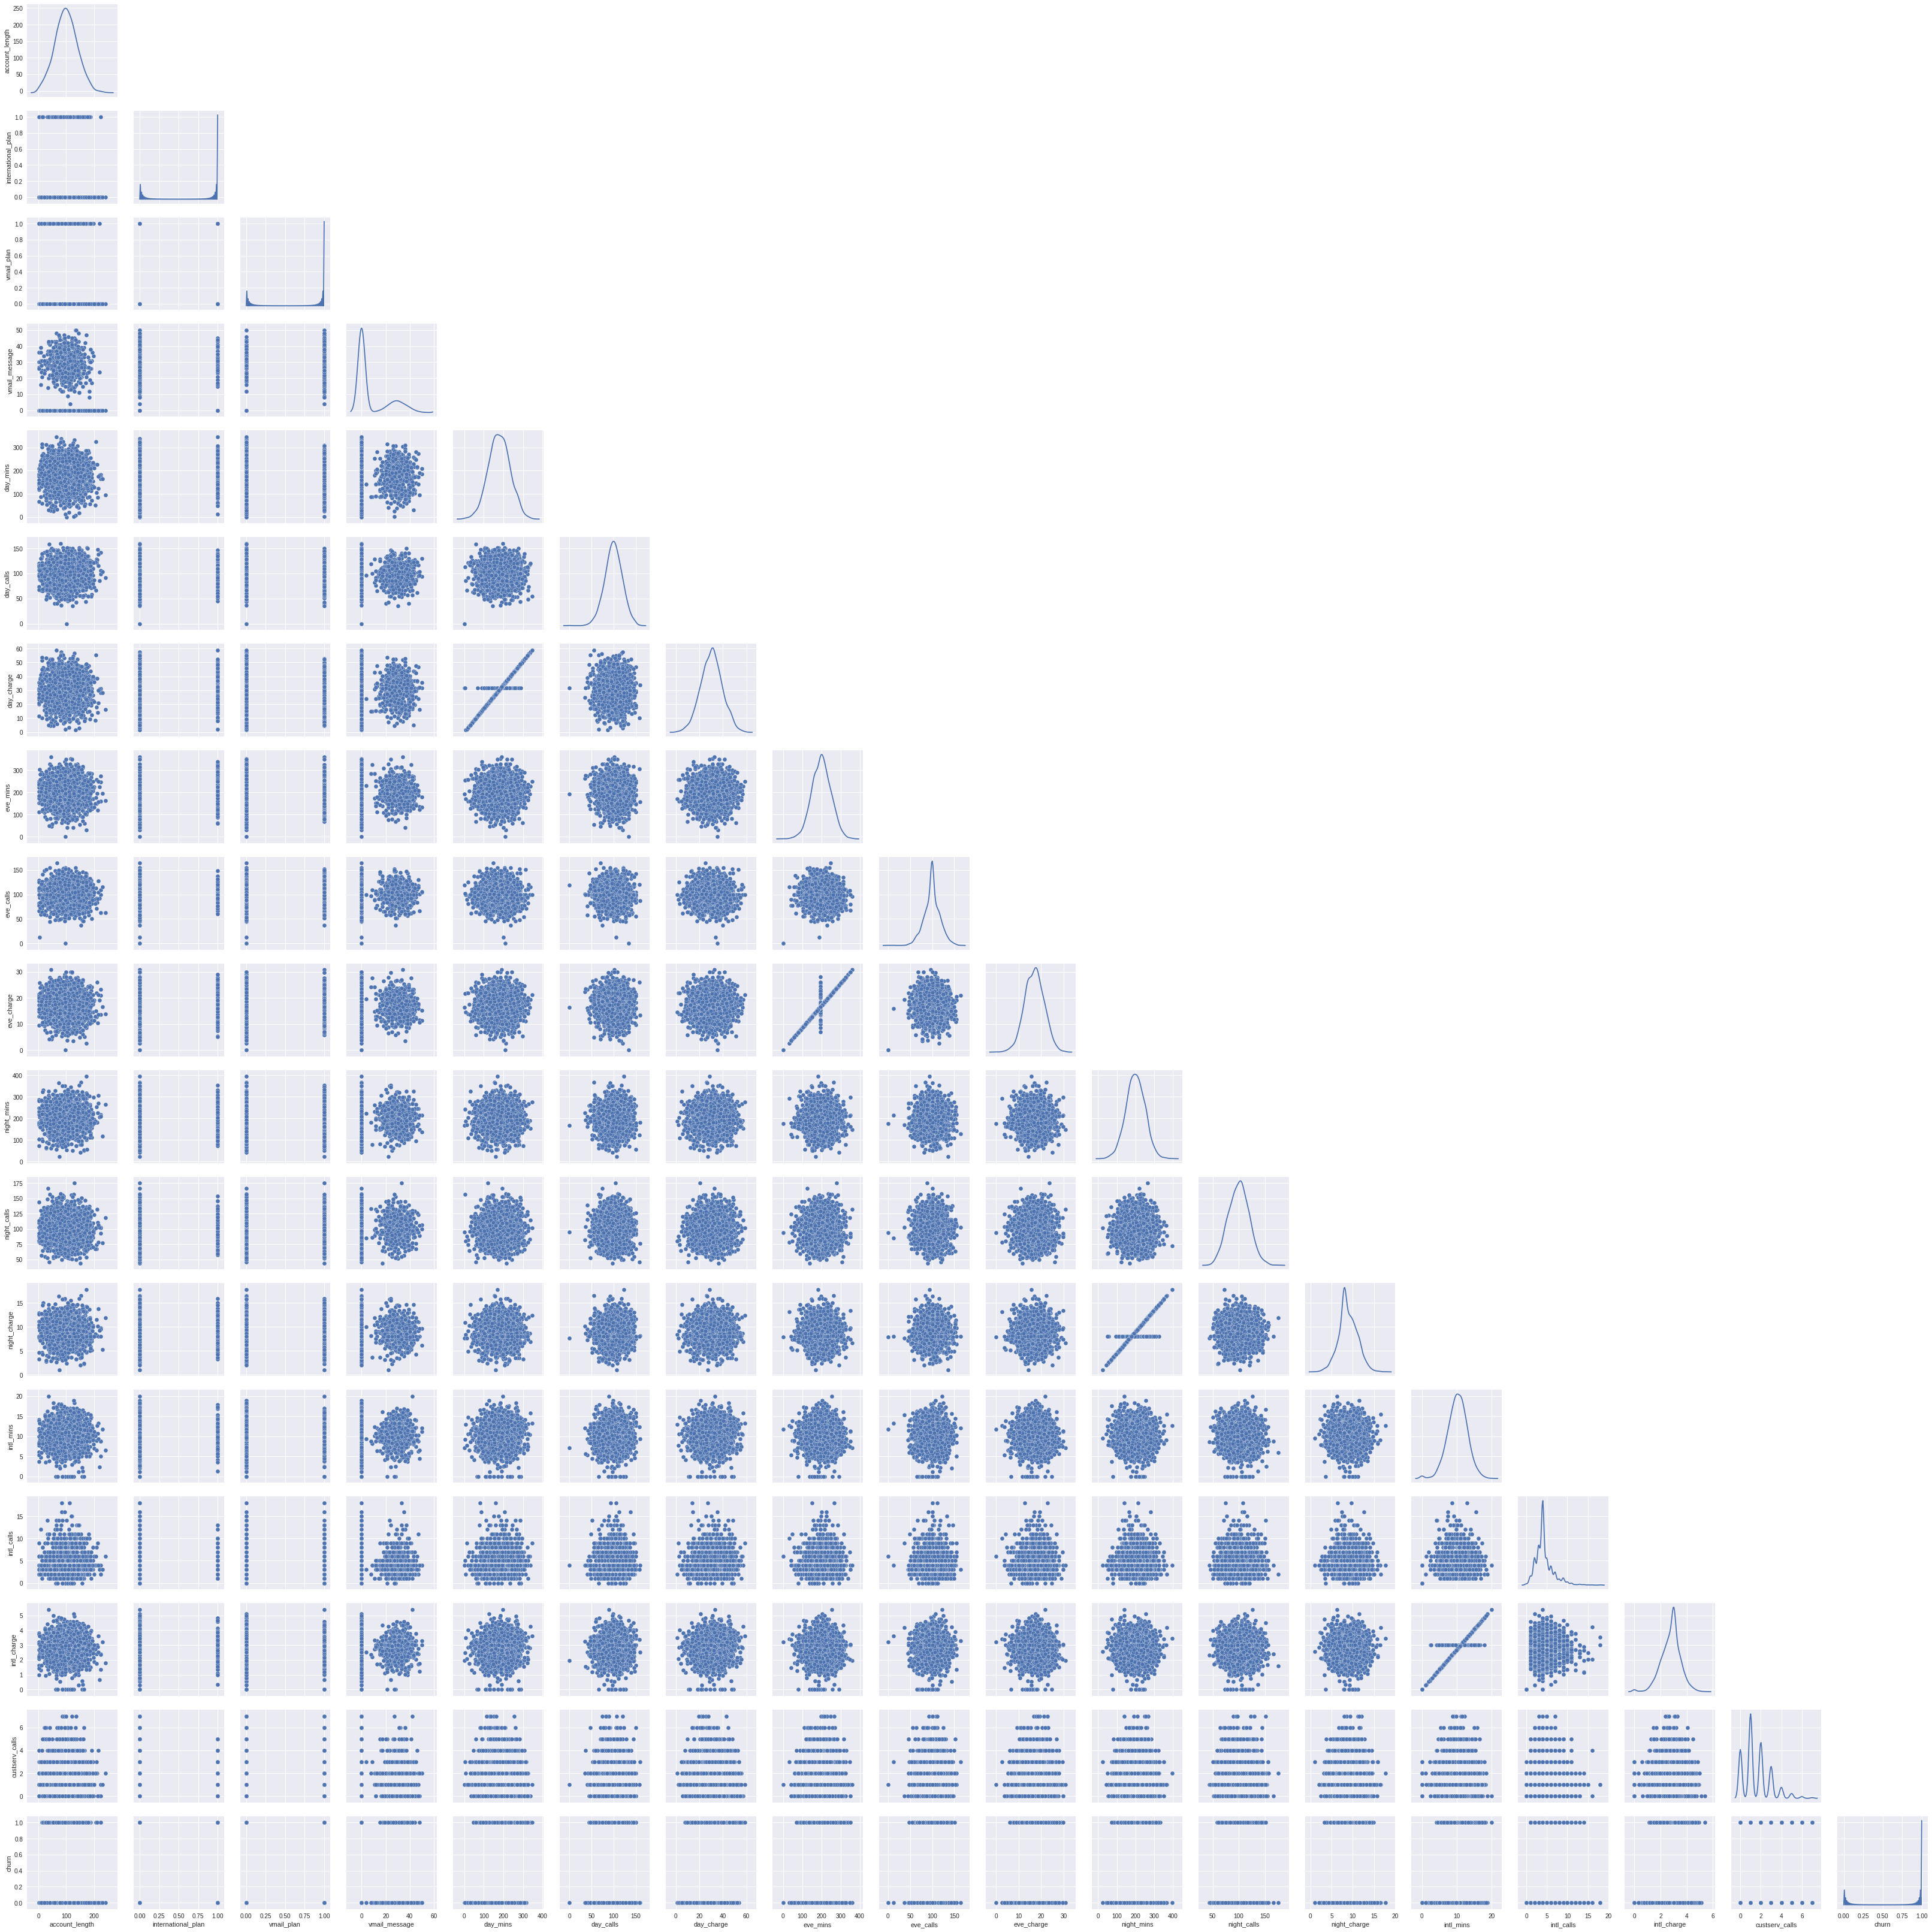

In [0]:
pairs = sns.pairplot(df, diag_kind='kde')

for i, j in zip(*np.triu_indices_from(pairs.axes, 1)):
    pairs.axes[i, j].set_visible(False)
    
plt.show()


## Data Preparation

You will probably go back and forth between data preparation and data understanding. Some of the data you won't be able to explore until it is cleaned, and visa versa.

Real world data is messy, and this dataset is no exception. Start off by identifying the features that seem useful, and work on cleaning/preparing those columns first. Remember that you don't have to use every column of a dataset when you are fitting your model.

In [0]:
cols = list(df.drop(['churn'], axis = 1).columns)

# split data into train and test sets
train, test = train_test_split(df, test_size = 0.33, random_state = 8)

def forest(features, trees):
  # Set up our RandomForestClassifier instance and fit to data
  clf = RandomForestClassifier(n_estimators = trees, max_features = features)
  clf.fit(train[cols], train['churn'])

  # Make predictions
  predictions = clf.predict(test[cols])
  probs = clf.predict_proba(test[cols])
#   display(predictions)

  score = clf.score(test[cols], test['churn'])
  return score
  
max_a = 0
max_i = 0
for i in np.linspace(0.1,1,10):
  score = forest(i, 30)
  print(round(i,1),' Accuracy: ', score)
  if score > max_a:
    max_a = score
    max_i = i
print(round(max_i,2), ': ', max_a)

0.1  Accuracy:  0.9005449591280654
0.2  Accuracy:  0.9264305177111717
0.3  Accuracy:  0.9359673024523161
0.4  Accuracy:  0.9359673024523161
0.5  Accuracy:  0.94141689373297
0.6  Accuracy:  0.9386920980926431
0.7  Accuracy:  0.9427792915531336
0.8  Accuracy:  0.9400544959128065
0.9  Accuracy:  0.9400544959128065
1.0  Accuracy:  0.9455040871934605
1.0 :  0.9455040871934605


In [0]:
max_a = 0
max_i = 0
for i in range(20, 41, 5):
  score = forest(0.5, i)
#   print(round(i,1),' Accuracy: ', score)
  if score > max_a:
    max_a = score
    max_i = i
print(round(max_i,2), ': ', max_a)

40 :  0.9427792915531336


In [0]:
clf = RandomForestClassifier(n_estimators = 40, max_features = 0.5)
clf.fit(train[cols], train['churn'])

# Make predictions
predictions = clf.predict(test[cols])
probs = clf.predict_proba(test[cols])
#   display(predictions)

score = clf.score(test[cols], test['churn'])

## Modeling

We've talked a lot about Logistic Regression so far, but there are a **lot** of classification models that you could use. In this section you will get a chance to do a little bit of research about 5 important classification algorithms. 

The purpose of this section is to give you a very very brief introduction to a few of the most popular supervised learning classification algorithms. It is **not** the purpose of this section/assignment that you understand all of the mathematical and programmatic inner-workings of these algorithms, but rather to give you a high level overview of their usage. Please defer your curiosity and perfectionism temporarily and focus on what you need to know in order to get an out-of-the box prediction from these classifiers using the sklearn library.

*   Support Vector Machine
*   Decision Tree Classifier
*   Random Forest Classifier
*   Naive Bayes Classifier
*   K-Nearest Neighbors Classifier


Once you have successfully fit each of these models to the test dataset and calculated their out-of-the-box ROC_AUC score, pick the top two highest performing classifiers and research their hyperparameters for future hyperparameter tuning.

List their hyperparameters here:

### Highest performing model's hyperparameters:

### Second highest performing model's hyperparameters:

___

Below is sample code for how to get an out-of-the-box estimate for a Logistic Regression model. You may reference it when finding the out-of-the-box predictions for the other 5 models.


,Predicted False,Predicted True
Actual False,616,18
Actual True,27,73


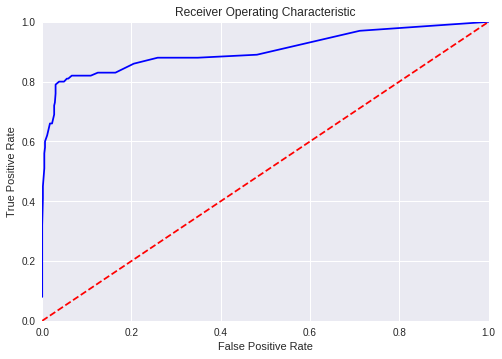

0.5


,Predicted False,Predicted True
Actual False,634,0
Actual True,100,0


In [0]:
from sklearn.metrics import confusion_matrix

confusion_matrix1 = pd.DataFrame(confusion_matrix(test["churn"], predictions), columns=["Predicted False", "Predicted True"], index=["Actual False", "Actual True"])
display(confusion_matrix1)

# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = roc_curve(test["churn"], probs[:,1])
# fpr, tpr, threshold = roc_curve(test["churn"], [0 for i in range(len(test))])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print(roc_auc_score(test["churn"], [0 for i in range(len(test))]))
confusion_matrix2 = pd.DataFrame(confusion_matrix(test["churn"], [0 for i in range(len(test))]), columns=["Predicted False", "Predicted True"], index=["Actual False", "Actual True"])
display(confusion_matrix2)

,importance,labels
4,0.161204,day_mins
6,0.128934,day_charge
16,0.117126,custserv_calls
9,0.072163,eve_charge
7,0.059896,eve_mins


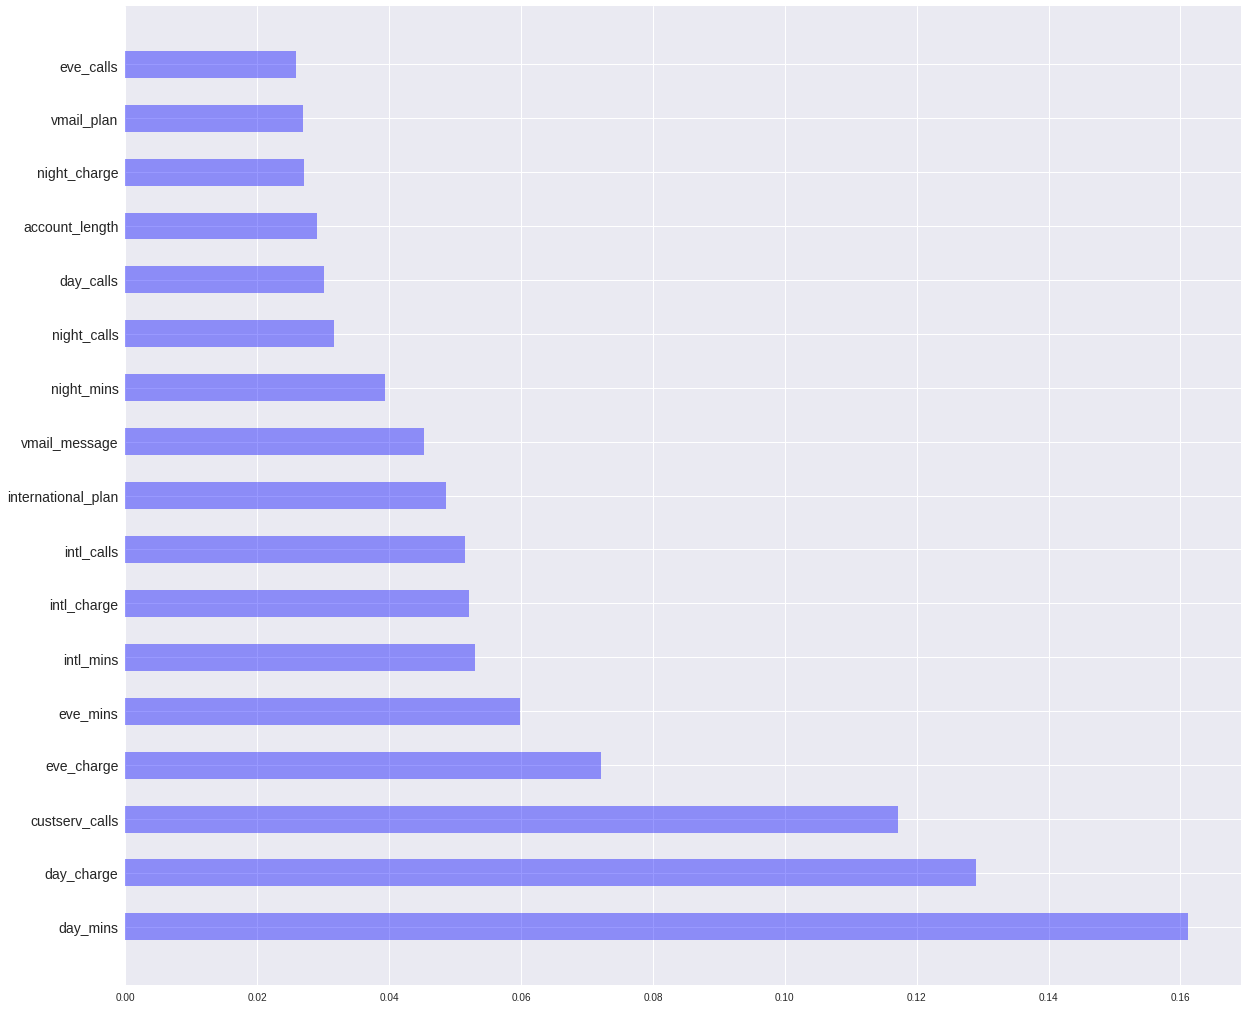

In [0]:
# Feature relevance chart

# for i in range(1, 11):
#   clf = RandomForestClassifier(n_estimators = 100, max_features = 0.5, min_samples_leaf = i)
#   clf.fit(train[cols], train['churn'])
#   print(i, ': ', clf.score(test[cols], test['churn']))

# Make predictions
predictions = clf.predict(test[cols])
probs = clf.predict_proba(test[cols])

fig = plt.figure(figsize=(20, 18))
ax = fig.add_subplot(111)

df_f = pd.DataFrame(clf.feature_importances_, columns=["importance"])
df_f["labels"] = cols
df_f.sort_values("importance", inplace=True, ascending=False)
display(df_f.head(5))

index = np.arange(len(clf.feature_importances_))
bar_width = 0.5
rects = plt.barh(index, df_f["importance"], bar_width, alpha=0.4, color='b', label='Main')
plt.yticks(index, df_f["labels"], fontsize = 14)
plt.show()

## Evaluation

Start off by making a submission to the Kaggle leaderboard that is purely a column of all 1s or 0s as a baseline. There is a sampleSubmission.csv file that is already prepared in this format if you would like to use that.

pick one of the better models from your out-of-the-box analysis and then use it to make predictions on the test dataset. Then take those predictions and make a new submission to the leaderboad. You are allowed 20 submissions to the leaderboard per day, so don't go submitting willy nilly.

Try and ensure that you have truly improved your classifier before making a new submission. Use the cross-validation techniques that we have been studying to evaluate your model on the training dataset before going to the trouble of making predictions on the test dataset and having to format a new submission.

## Repeat

The Machine Learning Framework is a cycle. Keep on looping through it and improving your classifier. Don't delete your previous work since we want to see how your thinking developed. Go back and try some hyperparameter tuning, format additional columns/features so that they are ready to be fed to the model. Keep on working down below, don't be afraid to add lots of code cells to your Colab.

## Stretch Goal:

Try and get the highest score that you possibly can. If you're not on the top of the leaderboard, then there must still be ways to improve your classifier that you haven't considered yet.

# ---------------------------- K-FOLD -----------------------------

In [0]:
# ---------- IMPUTE MISSING VALUES -----------------

# from statsmodels.imputation.mice import MICEData as md
from fancyimpute import KNN, MICE

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/churn-data/master/train.csv")
df = df.drop(['phone', 'area_code'], axis = 1)
df = df.drop(['id', 'state'], axis = 1)

# convert 'yes', 'no' to 1, 0
df = df.applymap(lambda x: 1 if x == 'yes' else x)
df = df.applymap(lambda x: 0 if x == 'no' else x)

all_cols = list(df.columns)
cols = list(df.columns)[:-1]

# --------------- IMPUTE --------------------
df = df.replace('?', np.NaN)
df = df.apply(pd.to_numeric)  
# df = df.as_matrix()
df = pd.DataFrame(KNN(63).complete(df))

df.columns = all_cols


# ---------------- SCALE -------------------
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
df_X = df[cols]
df_y = df['churn']
df_X = pd.DataFrame(sc.fit_transform(df[cols]))
df_X = df_X.append(df_y)

df = pd.DataFrame(df)
df.columns = all_cols

# ------------- row copies ------------------------
# df_extra_1s = df[df['churn']==1]
# df = df.append(df_extra_1s)
# df = df.append(df_extra_1s)
# df = df.append(df_extra_1s)
# df = df.append(df_extra_1s)
# df = df.append(df_extra_1s)

# ------------------ SMOTE ------------------------
from imblearn.over_sampling import SMOTE
from collections import Counter

sm = SMOTE(ratio='minority')

X_sm, y_sm = sm.fit_sample(df[cols], df['churn'])

print(Counter(y_sm))

df2 = pd.DataFrame(X_sm)
y_sm = pd.DataFrame(y_sm)
df2.columns = cols
df2['churn'] = y_sm

df2 = df.as_matrix()

# -------------------- RFC ---------------------
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestClassifier(bootstrap= True, max_depth= 110, max_features= 17, min_samples_leaf= 2, min_samples_split = 2, n_estimators= 130, random_state = 8)
clf.fit(df2[:,:-1], df2[:,-1])
predictions = clf.predict(df2[:,:-1])
# probs = clf.predict_proba(X_test)

# ------------------- K-FOLD -------------------
from sklearn.model_selection import KFold
cv = KFold(n_splits = 2)

y_pred = cross_val_predict(clf, df2[:,:-1], df2[:,-1], cv = cv)
accuracy = accuracy_score(y_pred.astype(int), df2[:,-1])

print(accuracy)

print(roc_auc_score(y_pred.astype(int), df2[:,-1]))
print(roc_auc_score(predictions, df2[:,-1]))

Imputing row 1/2222 with 0 missing, elapsed time: 1.016
Imputing row 101/2222 with 1 missing, elapsed time: 1.019
Imputing row 201/2222 with 2 missing, elapsed time: 1.022
Imputing row 301/2222 with 2 missing, elapsed time: 1.025
Imputing row 401/2222 with 3 missing, elapsed time: 1.028
Imputing row 501/2222 with 1 missing, elapsed time: 1.030
Imputing row 601/2222 with 0 missing, elapsed time: 1.033
Imputing row 701/2222 with 1 missing, elapsed time: 1.036
Imputing row 801/2222 with 1 missing, elapsed time: 1.038
Imputing row 901/2222 with 0 missing, elapsed time: 1.041
Imputing row 1001/2222 with 1 missing, elapsed time: 1.044
Imputing row 1101/2222 with 1 missing, elapsed time: 1.047
Imputing row 1201/2222 with 1 missing, elapsed time: 1.050
Imputing row 1301/2222 with 0 missing, elapsed time: 1.053
Imputing row 1401/2222 with 2 missing, elapsed time: 1.056
Imputing row 1501/2222 with 0 missing, elapsed time: 1.059
Imputing row 1601/2222 with 1 missing, elapsed time: 1.061
Imputing 

In [0]:
# ---------- IMPUTE MISSING VALUES -----------------
trainK = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/churn-data/master/train.csv")
trainK = trainK.drop(['id', 'phone', 'area_code', 'state'], axis = 1)
testK = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/churn-data/master/test.csv")
ids = testK['id']
testK = testK.drop(['id', 'phone', 'area_code', 'state'], axis = 1)

all_cols = list(trainK.columns)
cols = all_cols[:-1]

print(trainK['churn'].value_counts())

# convert 'yes', 'no' to 1, 0
trainK = trainK.applymap(lambda x: 1 if x == 'yes' else x)
trainK = trainK.applymap(lambda x: 0 if x == 'no' else x)
testK = testK.applymap(lambda x: 1 if x == 'yes' else x)
testK = testK.applymap(lambda x: 0 if x == 'no' else x)
  
# # ---------- IMPUTER df -------------------------
trainK = trainK.replace('?', np.NaN)
trainK = trainK.apply(pd.to_numeric)  
trainK = pd.DataFrame(KNN(10).complete(trainK))

trainK.columns = all_cols

testK = testK.replace('?', np.NaN)
testK = testK.apply(pd.to_numeric)  
testK = pd.DataFrame(KNN(10).complete(testK))

testK.columns = all_cols

# -------------------- RFC ---------------------
clf = RandomForestRegressor(bootstrap= True, max_depth= 110, max_features= 8, min_samples_leaf= 1, min_samples_split = 2, n_estimators= 130, random_state = 8)
clf.fit(trainK[cols], trainK['churn'])
predictions = clf.predict(testK[cols])

print(predictions)

0    1897
1     325
Name: churn, dtype: int64
Imputing row 1/2222 with 0 missing, elapsed time: 1.003
Imputing row 101/2222 with 1 missing, elapsed time: 1.006
Imputing row 201/2222 with 2 missing, elapsed time: 1.009
Imputing row 301/2222 with 2 missing, elapsed time: 1.012
Imputing row 401/2222 with 3 missing, elapsed time: 1.015
Imputing row 501/2222 with 1 missing, elapsed time: 1.017
Imputing row 601/2222 with 0 missing, elapsed time: 1.020
Imputing row 701/2222 with 1 missing, elapsed time: 1.023
Imputing row 801/2222 with 1 missing, elapsed time: 1.025
Imputing row 901/2222 with 0 missing, elapsed time: 1.028
Imputing row 1001/2222 with 1 missing, elapsed time: 1.031
Imputing row 1101/2222 with 1 missing, elapsed time: 1.034
Imputing row 1201/2222 with 1 missing, elapsed time: 1.037
Imputing row 1301/2222 with 0 missing, elapsed time: 1.039
Imputing row 1401/2222 with 2 missing, elapsed time: 1.042
Imputing row 1501/2222 with 0 missing, elapsed time: 1.045
Imputing row 1601/2222

In [0]:
RFC2 = pd.DataFrame(ids)
RFC2['churn'] = np.round(predictions)
RFC2 = RFC2[['id','churn']]
print(RFC2)

from google.colab import files
RFC2.to_csv('RFC2.csv', index = False)
files.download('RFC2.csv')

        id  churn
0      221    0.0
1     1313    0.0
2     1635    1.0
3      289    1.0
4     2416    0.0
5     3112    1.0
6      601    1.0
7      326    0.0
8     2783    0.0
9      454    1.0
10     439    0.0
11    1783    0.0
12    2091    0.0
13    3082    0.0
14    2821    0.0
15    1345    1.0
16    2206    0.0
17    1557    0.0
18     483    0.0
19     795    0.0
20    3244    0.0
21    3219    0.0
22    1862    0.0
23     292    0.0
24    1898    1.0
25    3014    0.0
26     799    0.0
27    2347    1.0
28     763    0.0
29    2806    0.0
...    ...    ...
1081   702    0.0
1082   668    0.0
1083  2219    0.0
1084  3006    0.0
1085  2812    0.0
1086   537    0.0
1087  2856    0.0
1088   141    0.0
1089  1271    0.0
1090  1799    0.0
1091   556    0.0
1092  1975    0.0
1093  1904    1.0
1094  2844    0.0
1095  3117    0.0
1096  1958    0.0
1097  1209    0.0
1098   280    0.0
1099  1829    0.0
1100   542    0.0
1101  1633    0.0
1102  2906    0.0
1103  2404    0.0
1104   450

In [0]:
from sklearn.neural_network import MLPClassifier

y = LabelBinarizer().fit_transform(y_sm)
X = StandardScaler().fit_transform(X_sm)

mlp = MLPClassifier(n_epochs=10,
                    solver_kwargs={'learning_rate': 0.05},
                    random_state=4567).fit(X, y)

cv = KFold(n_splits=20, random_state=8, shuffle=True)
y_oos = cross_val_predict(mlp, X, y, cv=cv, method='predict_proba')
auc = roc_auc_score(y, y_oos, average=None)
print(auc)


# -------------------------------- RANDOM FOREST ---------------------------------------



## Prep

In [0]:
# ---------- IMPUTE MISSING VALUES -----------------

# from statsmodels.imputation.mice import MICEData as md
from fancyimpute import KNN, MICE

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/churn-data/master/train.csv")
df = df.drop(['phone', 'area_code'], axis = 1)
df = df.drop(['id', 'state'], axis = 1)

# convert 'yes', 'no' to 1, 0
df = df.applymap(lambda x: 1 if x == 'yes' else x)
df = df.applymap(lambda x: 0 if x == 'no' else x)

# for c in df.columns:
#   df[c] = df[c].replace('?', np.median([float(x)  for x in list(df[c].values) if str(x).isnumeric()]))

df = df.replace('?', np.NaN)
df = df.apply(pd.to_numeric)  
# df = df.as_matrix()
df_filled = pd.DataFrame(KNN(10).complete(df))

print(df['churn'].value_counts())

Imputing row 1/2222 with 0 missing, elapsed time: 1.087
Imputing row 101/2222 with 1 missing, elapsed time: 1.090
Imputing row 201/2222 with 2 missing, elapsed time: 1.093
Imputing row 301/2222 with 2 missing, elapsed time: 1.096
Imputing row 401/2222 with 3 missing, elapsed time: 1.098
Imputing row 501/2222 with 1 missing, elapsed time: 1.101
Imputing row 601/2222 with 0 missing, elapsed time: 1.103
Imputing row 701/2222 with 1 missing, elapsed time: 1.106
Imputing row 801/2222 with 1 missing, elapsed time: 1.108
Imputing row 901/2222 with 0 missing, elapsed time: 1.110
Imputing row 1001/2222 with 1 missing, elapsed time: 1.113
Imputing row 1101/2222 with 1 missing, elapsed time: 1.115
Imputing row 1201/2222 with 1 missing, elapsed time: 1.118
Imputing row 1301/2222 with 0 missing, elapsed time: 1.121
Imputing row 1401/2222 with 2 missing, elapsed time: 1.123
Imputing row 1501/2222 with 0 missing, elapsed time: 1.126
Imputing row 1601/2222 with 1 missing, elapsed time: 1.128
Imputing 

In [0]:

def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

# ----------------------------------------------- PREP --------------------------------------------------------------------
df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/churn-data/master/train.csv")
df = df.drop(['phone', 'area_code'], axis = 1)
df = df.drop(['id', 'state'], axis = 1)

# -------------------------- add more 1 sample copies -------------------------------
# df_extra_1s = df[df['churn']==1]
# df = df.append(df_extra_1s)
# df = df.append(df_extra_1s)
# df = df.append(df_extra_1s)
# df = df.append(df_extra_1s)
# df = df.append(df_extra_1s)
# -----------------------------------------------------------------------------------

all_cols = list(df.columns)
cols = list(df.columns)[:-1]
print(df['churn'].value_counts())

# convert 'yes', 'no' to 1, 0
df.replace(('yes', 'no'), (1, 0), inplace=True)

# replace '?' with column median for that churn outcome
# df0 = df[df['churn']==0].copy()
# df1 = df[df['churn']==1].copy()

# for c in df.columns:
#   df0[c] = df0[c].replace('?', np.median([float(x)  for x in list(df0[c].values) if str(x).isnumeric()]))
#   df1[c] = df1[c].replace('?', np.median([float(x)  for x in list(df1[c].values) if str(x).isnumeric()]))
#   df0[c].fillna(np.median([float(x)  for x in list(df0[c].values) if str(x).isnumeric()]), inplace = True)
#   df1[c].fillna(np.median([float(x)  for x in list(df1[c].values) if str(x).isnumeric()]), inplace = True)
# df = df0.append(df1)

# ---------- IMPUTER df -------------------------
df = df.replace('?', np.NaN)
df = df.apply(pd.to_numeric)  
df =df.as_matrix()
df = pd.DataFrame(KNN(63, verbose = False).complete(df));
# -----------------------------------------------


# rf = RandomForestClassifier(bootstrap= True, max_depth= 110, max_features= 3, min_samples_leaf= 3, min_samples_split= 8, n_estimators= 100, random_state = 8)
# knn_errs = []
# kvals = np.linspace(1, 100, 20, dtype='int64')
# for k in kvals:
#     knn_err = []
#     dfi = KNN(k=k, verbose=False).complete(df)
#     knn_err = cross_val_score(rf, dfi[:,:-1], dfi[:,-1], cv=10, n_jobs=-1).mean()

#     knn_errs.append(knn_err)
#     print(k, "[KNN] Estimated RF Test Error (n = {}, k = {}, 10-fold CV): {}".format(len(dfi), k, np.mean(knn_err)))

df.columns = all_cols

# Feature Scaling
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
df_X = df[cols]
df_y = df['churn']
df_X = pd.DataFrame(sc.fit_transform(df[cols]))
df_X = df_X.append(df_y)

df = pd.DataFrame(df)
df.columns = all_cols


# for c in df.columns:
#   df[c] = df[c].replace('?', np.median([float(x)  for x in list(df[c].values) if str(x).isnumeric()]))

# ------------------ SMOTE ------------------------
from imblearn.over_sampling import SMOTE

sm = SMOTE(ratio='minority')

# X_sm, y_sm = sm.fit_sample(df[:,:-1], df[:,-1])
X_sm, y_sm = sm.fit_sample(df[cols], df['churn'])

# # plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.25, random_state = 8)
# -------------------------------------------------

# --------------- SMOTE + Tomek -------------------
# from imblearn.combine import SMOTETomek

# smt = SMOTETomek(ratio='auto')
# X_smt, y_smt = smt.fit_sample(df[cols], df['churn'])

# plot_2d_space(X_smt, y_smt, 'SMOTE + Tomek links')

# X_train, X_test, y_train, y_test = train_test_split(X_smt, y_smt, test_size = 0.33, random_state=2)
# -------------------------------------------------

print(Counter(y_sm))

# splitting data into training and test set

# X_train, X_test, y_train, y_test = train_test_split(df[cols], df['churn'], test_size = 0.33, random_state=2)
# --------------------------------------------------------------------------------------------------------------------------------------

# Set up our RandomForestClassifier instance and fit to data
clf = RandomForestClassifier(bootstrap= True, max_depth= 110, max_features= 3, min_samples_leaf= 3, min_samples_split= 8, n_estimators= 100, random_state = 8)

cvp = cross_val_predict(clf, X_train, y_train, cv=10)

clf.fit(X_train, y_train)

# Make predictions
predictions = clf.predict(X_test)
probs = clf.predict_proba(X_test)

y = list(y_test)
yhat = list(predictions)

conf = pd.DataFrame(confusion_matrix(y, yhat), columns=["Predicted False", "Predicted True"], index=["Actual False", "Actual True"])
display(conf)

c = 0
for i in range(len(y)):
  if yhat[i] == y[i]: c += 1
print(c/len(list(y)))
print(roc_auc_score(y, yhat))
print(roc_auc_score(y_train, cvp))

X = X_sm
y = y_sm

0    1897
1     325
Name: churn, dtype: int64
Counter({0.0: 1897, 1.0: 1897})


,Predicted False,Predicted True
Actual False,460,29
Actual True,32,428


0.9357218124341412
0.9355650395661065
0.9392604937685836


### Extra

In [0]:

# # ------------------------------------
# # ---------------------------------- EXTRA for prep ----------------------------------------------------------------------------------------------------
# dist_from_ca = [4106.5, 1183.2, 4088.0, 4398.0, 4104.2, 4474.7, 3868.7, 3477.0, 2902.2, 3946.1, 4582.5, 892.2, 4258.4, 1610.2, 4097.0, 1461.2, 4958.0,
#                 4700.3, 4493.1, 4104.2, 3867.9, 2473.2, 5111.0, 2262.2, 4104.2, 2629.8, 2965.4, 4260.3, 1243.1, 3351.9, 1, 3473.6, 1072.7, 3714.5, 4104.2,
#                 4103.7, 5215.3, 4041.6, 2786.8, 2021.0, 1797.4, 1873.3, 3501.4, 3229.4, 4953.3, 2344.5, 4643.9, 4348.9, 3059.4, 4103.4, 2974.3]
# # add column of distances from California
# states_X_train = list(X_train['state'].unique())
# dic_X_train = dict(zip(states_X_train, dist_from_ca))
# X_train['distance'] = [dic_X_train[s]/10 for s in X_train['state'].values]

# # add column of cellphone taxes per state
# taxes_X_train = pd.read_csv("https://raw.githubusercontent.com/MarynaLongnickel/Lambda-Challenge/master/taxes.csv")
# taxes_dict_X_train = dict(zip(taxes_X_train['state'], taxes_X_train['taxes']))
# X_train['taxes'] = [taxes_dict_X_train[s]*100 for s in X_train['state'].values]

# # add a column indicating whether T-Mobile is the main service provider in the state
# tmobile = ['CO', 'NM', 'WA', 'MN', 'NY', 'MD']
# state_list_X_train = list(X_train['state'])
# t_state_X_train = []
# for i in state_list_X_train:
#   if i in tmobile: t_state_X_train.append(1)
#   else: t_state_X_train.append(0)
# X_train['t_state'] = t_state_X_train

# # add col for distance * day min
# X_train['dist_mins'] = X_train['distance']*X_train['day_mins']*X_train['custserv_calls']/1000

# dista_X_train = list(X_train['distance'])
# evem_X_train = list(X_train['eve_mins'])
# de_X_train = []

# for i in range(len(dista_X_train)):
#   de_X_train.append(dista_X_train[i]*int(float(evem_X_train[i])))

# X_train['2'] = de_X_train 
 
# X_train = X_train.drop(['state'], axis = 1)  
# # ------------------------------------

# # add column of distances from California
# states_X_test = list(X_test['state'].unique())
# dic_X_test = dict(zip(states_X_test, dist_from_ca))
# X_test['distance'] = [dic_X_test[s]/10 for s in X_test['state'].values]

# # add column of cellphone taxes per state
# taxes_X_test = pd.read_csv("https://raw.githubusercontent.com/MarynaLongnickel/Lambda-Challenge/master/taxes.csv")
# taxes_dict_X_test = dict(zip(taxes_X_test['state'], taxes_X_test['taxes']))
# X_test['taxes'] = [taxes_dict_X_test[s]*100 for s in X_test['state'].values]

# # add a column indicating whether T-Mobile is the main service provider in the state
# tmobile = ['CO', 'NM', 'WA', 'MN', 'NY', 'MD']
# state_list_X_test = list(X_test['state'])
# t_state_X_test = []
# for i in state_list_X_test:
#   if i in tmobile: t_state_X_test.append(1)
#   else: t_state_X_test.append(0)
# X_test['t_state'] = t_state_X_test

# # add col for distance * day min
# X_test['dist_mins'] = X_test['distance']*X_test['day_mins']*X_test['custserv_calls']/1000

# dista_X_test = list(X_test['distance'])
# evem_X_test = list(X_test['eve_mins'])
# de_X_test = []

# for i in range(len(dista_X_test)):
#   de_X_test.append(dista_X_test[i]*int(float(evem_X_test[i])))

# X_test['2'] = de_X_test
 
# X_test = X_test.drop(['state'], axis = 1)  
# # -------------------------------------------------------------------------------------------------------



# --------------- TRAIN ------------





# --------------------- .....useless..... -----------------------  

# # --------------------------- EXTRA for train ---------------------------  

# dist_from_ca = [4106.5, 1183.2, 4088.0, 4398.0, 4104.2, 4474.7, 3868.7, 3477.0, 2902.2, 3946.1, 4582.5, 892.2, 4258.4, 1610.2, 4097.0, 1461.2, 4958.0,
#                 4700.3, 4493.1, 4104.2, 3867.9, 2473.2, 5111.0, 2262.2, 4104.2, 2629.8, 2965.4, 4260.3, 1243.1, 3351.9, 1, 3473.6, 1072.7, 3714.5, 4104.2,
#                 4103.7, 5215.3, 4041.6, 2786.8, 2021.0, 1797.4, 1873.3, 3501.4, 3229.4, 4953.3, 2344.5, 4643.9, 4348.9, 3059.4, 4103.4, 2974.3]
# # add column of distances from California
# states_X_train = list(X_train['state'].unique())
# dic_X_train = dict(zip(states_X_train, dist_from_ca))
# X_train['distance'] = [dic_X_train[s]/10 for s in X_train['state'].values]

# # add column of cellphone taxes per state
# taxes_X_train = pd.read_csv("https://raw.githubusercontent.com/MarynaLongnickel/Lambda-Challenge/master/taxes.csv")
# taxes_dict_X_train = dict(zip(taxes_X_train['state'], taxes_X_train['taxes']))
# X_train['taxes'] = [taxes_dict_X_train[s]*100 for s in X_train['state'].values]

# # add a column indicating whether T-Mobile is the main service provider in the state
# tmobile = ['CO', 'NM', 'WA', 'MN', 'NY', 'MD']
# state_list_X_train = list(X_train['state'])
# t_state_X_train = []
# for i in state_list_X_train:
#   if i in tmobile: t_state_X_train.append(1)
#   else: t_state_X_train.append(0)
# X_train['t_state'] = t_state_X_train

# # add col for distance * day min
# X_train['dist_mins'] = X_train['distance']*X_train['day_mins']*X_train['custserv_calls']/1000

# dista_X_train = list(X_train['distance'])
# evem_X_train = list(X_train['eve_mins'])
# de_X_train = []

# for i in range(len(dista_X_train)):
#   de_X_train.append(dista_X_train[i]*int(float(evem_X_train[i])))

# X_train['2'] = de_X_train 
 
# X_train = X_train.drop(['state'], axis = 1)  
# # -----------------------------------------------------------------

# # ---------------------------- EXTRA for test -------------------------------

# # add column of distances from California
# states_testK = list(testK['state'].unique())
# dic_testK = dict(zip(states_testK, dist_from_ca))
# testK['distance'] = [dic_testK[s]/10 for s in testK['state'].values]

# # add column of cellphone taxes per state
# taxes_testK = pd.read_csv("https://raw.githubusercontent.com/MarynaLongnickel/Lambda-Challenge/master/taxes.csv")
# taxes_dict_testK = dict(zip(taxes_testK['state'], taxes_testK['taxes']))
# testK['taxes'] = [taxes_dict_testK[s]*100 for s in testK['state'].values]

# # add a column indicating whether T-Mobile is the main service provider in the state
# tmobile = ['CO', 'NM', 'WA', 'MN', 'NY', 'MD']
# state_list_testK = list(testK['state'])
# t_state_testK = []
# for i in state_list_testK:
#   if i in tmobile: t_state_testK.append(1)
#   else: t_state_testK.append(0)
# testK['t_state'] = t_state_testK

# # add col for distance * day min
# testK['dist_mins'] = testK['distance']*testK['day_mins']*testK['custserv_calls']/1000

# dista_testK = list(testK['distance'])
# evem_testK = list(testK['eve_mins'])
# de_testK = []

# for i in range(len(dista_testK)):
#   de_testK.append(dista_testK[i]*int(float(evem_testK[i])))

# testK['2'] = de_testK  

# testK = testK.drop(['state'], axis = 1) 
  
# cols = list(X_train.drop(['churn'], axis = 1).columns)
# # -------------------------------------------------------------

## Test

In [0]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

# ------------------------------------ TEST -------------------------------------------
trainK = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/churn-data/master/train.csv")
trainK = trainK.drop(['id', 'phone', 'area_code', 'state'], axis = 1)
testK = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/churn-data/master/test.csv")
ids = testK['id']
testK = testK.drop(['id', 'phone', 'area_code', 'state'], axis = 1)

print(trainK.shape)
print(testK.shape)

trainK_extra_1s = trainK[trainK['churn']==1]
trainK = trainK.append(trainK_extra_1s)
trainK = trainK.append(trainK_extra_1s)
trainK = trainK.append(trainK_extra_1s)
trainK = trainK.append(trainK_extra_1s)
trainK = trainK.append(trainK_extra_1s)
trainK = trainK.append(trainK_extra_1s)

print(trainK['churn'].value_counts())

# convert 'yes', 'no' to 1, 0
trainK = trainK.applymap(lambda x: 1 if x == 'yes' else x)
trainK = trainK.applymap(lambda x: 0 if x == 'no' else x)
testK = testK.applymap(lambda x: 1 if x == 'yes' else x)
testK = testK.applymap(lambda x: 0 if x == 'no' else x)

for c in trainK.columns:
  trainK[c] = trainK[c].replace('?', np.median([float(x)  for x in list(trainK[c].values) if str(x).isnumeric()]))
  
for c in testK.columns:
  testK[c] = testK[c].replace('?', np.median([float(x)  for x in list(testK[c].values) if str(x).isnumeric()]))
  
# # ---------- IMPUTER df -------------------------
# trainK = trainK.replace('?', np.NaN)
# trainK = trainK.apply(pd.to_numeric)  
# trainK = pd.DataFrame(KNN(3).complete(trainK))

# testK = testK.replace('?', np.NaN)
# testK = testK.apply(pd.to_numeric)  
# testK = pd.DataFrame(KNN(3).complete(testK))
# # -----------------------------------------------

# trainK.columns = all_cols
# testK.columns = all_cols


# # -------------- Feature Scaling -------------
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# trainK_X = trainK[cols]
# trainK_y = trainK['churn']
# trainK_X = pd.DataFrame(sc.fit_transform(trainK_X))
# trainK_X = trainK_X.append(trainK_y)

# trainK = pd.DataFrame(trainK)
# trainK.columns = all_cols

# testK_X = testK[cols]
# testK_y = testK['churn']
# testK_X = pd.DataFrame(sc.fit_transform(testK_X))
# testK_X = testK_X.append(testK_y)

# testK = pd.DataFrame(testK)
# testK.columns = all_cols
# --------------------------------------------------

# for c in df.columns:
#   df[c] = df[c].replace('?', np.median([float(x)  for x in list(df[c].values) if str(x).isnumeric()]))

# ------ SMOTE -----------
# from imblearn.over_sampling import SMOTE

# sm = SMOTE(ratio='minority')
# X_sm, y_sm = sm.fit_sample(trainK[cols], trainK['churn'])

# # plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

# from collections import Counter
# print('Count occurences: ', Counter(y_sm))

# X_train, y_train = X_sm, y_sm
# print('X shape: ', X_train.shape)
# print('y shape: ', y_train.shape)
#------------------------

# --------------- SMOTE + Tomek -------------------
# from imblearn.combine import SMOTETomek

# smt = SMOTETomek(ratio='auto')
# X_smt, y_smt = smt.fit_sample(trainK[cols], trainK['churn'])

# plot_2d_space(X_smt, y_smt, 'SMOTE + Tomek links')

# X_train, y_train = X_smt, y_smt
# -------------------------------------------------

cols = list(trainK.columns)[:-1]

X_test, y_test = testK[cols], testK['churn']

# --------------------------------------------------------------------

# Set up our RandomForestClassifier instance and fit to data
# clfK = RandomForestClassifier(bootstrap= True, max_depth= 110, max_features= 8, min_samples_leaf= 1, min_samples_split = 2, n_estimators= 130, random_state = 8)
clfK = RandomForestRegressor(bootstrap= True, max_depth= 110, max_features= 3, min_samples_leaf= 3, min_samples_split= 8, n_estimators= 100)
clfK.fit(X_train, y_train)

# Make predictions
predictionsK = clfK.predict(y_test)

(2222, 18)
(1111, 18)
1    2275
0    1897
Name: churn, dtype: int64


In [0]:
rfcsmote = pd.DataFrame(ids)
rfcsmote['churn'] = predictionsK
rfcsmote = rfcsmote[['id','churn']]
print(rfcsmote)
print(rfcsmote)

from google.colab import files
rfcsmote.to_csv('rfcsmote.csv', index = False)
files.download('rfcsmote.csv')

        id     churn
0      221  0.031571
1     1313  0.147759
2     1635  0.760712
3      289  0.650390
4     2416  0.247296
5     3112  0.847310
6      601  0.488627
7      326  0.068079
8     2783  0.058507
9      454  0.975829
10     439  0.073477
11    1783  0.157761
12    2091  0.152046
13    3082  0.130379
14    2821  0.341913
15    1345  0.747347
16    2206  0.021222
17    1557  0.103026
18     483  0.077083
19     795  0.059123
20    3244  0.249758
21    3219  0.205549
22    1862  0.773794
23     292  0.024167
24    1898  0.907517
25    3014  0.170417
26     799  0.129591
27    2347  0.389940
28     763  0.180694
29    2806  0.186272
...    ...       ...
1081   702  0.116710
1082   668  0.221864
1083  2219  0.083750
1084  3006  0.062517
1085  2812  0.031628
1086   537  0.061702
1087  2856  0.032030
1088   141  0.104155
1089  1271  0.286534
1090  1799  0.056147
1091   556  0.125268
1092  1975  0.162384
1093  1904  0.415679
1094  2844  0.125889
1095  3117  0.242075
1096  1958  0

In [0]:
# ------------------ WORKS THE BEST ---------------------------

# ------------------------------------ TEST -------------------------------------------
trainK = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/churn-data/master/train.csv")
trainK = trainK.drop(['id', 'phone', 'area_code', 'state'], axis = 1)
testK = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/churn-data/master/test.csv")
ids = testK['id']
testK = testK.drop(['id', 'phone', 'area_code', 'state'], axis = 1)

print(trainK.shape)
print(testK.shape)

trainK_extra_1s = trainK[trainK['churn']==1]
trainK = trainK.append(trainK_extra_1s)
trainK = trainK.append(trainK_extra_1s)
trainK = trainK.append(trainK_extra_1s)
trainK = trainK.append(trainK_extra_1s)
trainK = trainK.append(trainK_extra_1s)
trainK = trainK.append(trainK_extra_1s)

print(trainK['churn'].value_counts())

# convert 'yes', 'no' to 1, 0
trainK = trainK.applymap(lambda x: 1 if x == 'yes' else x)
trainK = trainK.applymap(lambda x: 0 if x == 'no' else x)
testK = testK.applymap(lambda x: 1 if x == 'yes' else x)
testK = testK.applymap(lambda x: 0 if x == 'no' else x)

for c in trainK.columns:
  trainK[c] = trainK[c].replace('?', np.median([float(x)  for x in list(trainK[c].values) if str(x).isnumeric()]))
  
for c in testK.columns:
  testK[c] = testK[c].replace('?', np.median([float(x)  for x in list(testK[c].values) if str(x).isnumeric()]))

cols = list(trainK.columns)[:-1]

X_train, y_train = trainK[cols], trainK['churn']
X_test, y_test = testK[cols], testK['churn']

# y_train = pd.DataFrame(y_train)
# y_test = pd.DataFrame(np.round(y_hat_test))
# X_train = X_train.append(X_test)
# y_train = y_train.append(y_test)
# X_train.columns = cols
# y_train.columns = ['churn']

# --------------------------------------------------------------------

# Set up our RandomForestClassifier instance and fit to data
# clfK = RandomForestClassifier(bootstrap= True, max_depth= 110, max_features= 8, min_samples_leaf= 1, min_samples_split = 2, n_estimators= 130, random_state = 8)
clfK = RandomForestRegressor(bootstrap= True, max_depth= 110, max_features= 3, min_samples_leaf= 3, min_samples_split= 8, n_estimators= 100)
clfK.fit(X_train, y_train)

# Make predictions
predictionsK = clfK.predict(X_test)


(2222, 18)
(1111, 18)
1    2275
0    1897
Name: churn, dtype: int64


In [0]:

# ------------------------------------ TEST -------------------------------------------
trainK = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/churn-data/master/train.csv")
testK = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/churn-data/master/test.csv")
# ids = testK['id']

# trainK = trainK.drop(['id', 'phone', 'area_code', 'state'], axis = 1)
# testK = testK.drop(['id', 'phone', 'area_code', 'state'], axis = 1)


trainK_extra_1s = trainK[trainK['churn']==1]
trainK = trainK.append(trainK_extra_1s)
trainK = trainK.append(trainK_extra_1s)
trainK = trainK.append(trainK_extra_1s)
trainK = trainK.append(trainK_extra_1s)
trainK = trainK.append(trainK_extra_1s)
trainK = trainK.append(trainK_extra_1s)
print(trainK.shape)

y = list(trainK['churn'].values)
y_un = [int(i) for i in y_hat_test['churn'].values]
y.extend(y_un)
y_big = y
y_big = pd.DataFrame(y_big)
y_big.columns = ['churn']

big = trainK.append(testK)

ids = big['id']
big = big.drop(['id', 'phone', 'area_code', 'state', 'churn'], axis = 1)
big['churn'] = y_big

print(big.shape)

print(trainK['churn'].value_counts())

# convert 'yes', 'no' to 1, 0
big = big.applymap(lambda x: 1 if x == 'yes' else x)
big = big.applymap(lambda x: 0 if x == 'no' else x)

for c in big.columns:
  big[c] = big[c].replace('?', np.median([float(x)  for x in list(big[c].values) if str(x).isnumeric()]))
  
cols = list(big.columns)[:-1]

# X_train, y_train = trainK[cols], trainK['churn']
# X_test, y_test = testK[cols], testK['churn']

# y_train = pd.DataFrame(y_train)
# y_test = pd.DataFrame(np.round(y_hat_test))
# X_train = X_train.append(X_test)
# y_train = y_train.append(y_test)
# X_train.columns = cols
# y_train.columns = ['churn']

# --------------------------------------------------------------------

# Set up our RandomForestClassifier instance and fit to data
# clfK = RandomForestClassifier(bootstrap= True, max_depth= 110, max_features= 8, min_samples_leaf= 1, min_samples_split = 2, n_estimators= 130, random_state = 8)
clfK = RandomForestRegressor(bootstrap= True, max_depth= 110, max_features= 3, min_samples_leaf= 3, min_samples_split= 8, n_estimators= 100)
clfK.fit(big[cols], big['churn'])

# Make predictions
predictionsK = clfK.predict(big[cols])

y = list(big['churn'].values)[:-1111]
yhat = list(np.round(predictionsK))[:-1111]

conf = pd.DataFrame(confusion_matrix(y, yhat), columns=["Predicted False", "Predicted True"], index=["Actual False", "Actual True"])
display(conf)

c = 0
for i in range(len(y)):
  if yhat[i] == y[i]: c += 1
print(c/len(list(y)))
print(roc_auc_score(y, yhat))

(4172, 22)
(5283, 18)
1    2275
0    1897
Name: churn, dtype: int64


,Predicted False,Predicted True
Actual False,1896,1
Actual True,0,2275


0.9997603068072867
0.999736425935688


# --------------- GRID SEARCH ---------------

In [0]:

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor
# Create the parameter grid based on the results of random search 
param_grid = {
   'bootstrap': [True],
   'max_depth': [110, 115],
   'max_features': [17],
   'min_samples_leaf': [1],
   'min_samples_split': [2],
   'n_estimators': [130, 135]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 6, n_jobs = -1, verbose = 2)
grid_search.fit(X_sm, list(y_sm.values))
print(grid_search.best_params_)

# rfr = RandomForestClassifier(bootstrap= True, max_depth= 110, max_features= 17, min_samples_leaf= 2, min_samples_split = 2, n_estimators= 130)

Fitting 6 folds for each of 4 candidates, totalling 24 fits
[CV] bootstrap=True, max_depth=110, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=130 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] bootstrap=True, max_depth=110, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=130 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=130, total=   3.8s
[CV] bootstrap=True, max_depth=110, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=130 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=130, total=   4.3s
[CV] bootstrap=True, max_depth=110, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=130 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=130, total=   5.0s
[CV] bootstrap=True, max_depth=110, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=130 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=130, total=   5.1s
[CV] bootstrap=True, max_depth=110, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=130 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=130, total=   4.9s
[CV] bootstrap=True, max_depth=110, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=135 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=130, total=   5.0s
[CV] bootstrap=True, max_depth=110, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=135 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=135, total=   4.9s
[CV] bootstrap=True, max_depth=110, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=135 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=135, total=   5.2s
[CV] bootstrap=True, max_depth=110, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=135 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=135, total=   5.2s
[CV] bootstrap=True, max_depth=110, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=135 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=135, total=   5.3s
[CV] bootstrap=True, max_depth=110, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=135 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=135, total=   5.2s
[CV] bootstrap=True, max_depth=115, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=130 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=135, total=   5.2s
[CV] bootstrap=True, max_depth=115, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=130 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=115, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=130, total=   4.6s
[CV] bootstrap=True, max_depth=115, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=130 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=115, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=130, total=   5.1s
[CV] bootstrap=True, max_depth=115, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=130 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=115, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=130, total=   5.1s
[CV] bootstrap=True, max_depth=115, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=130 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=115, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=130, total=   5.1s
[CV] bootstrap=True, max_depth=115, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=130 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=115, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=130, total=   5.0s
[CV] bootstrap=True, max_depth=115, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=135 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=115, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=130, total=   5.0s
[CV] bootstrap=True, max_depth=115, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=135 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=115, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=135, total=   4.9s
[CV] bootstrap=True, max_depth=115, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=135 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=115, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=135, total=   5.2s
[CV] bootstrap=True, max_depth=115, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=135 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=115, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=135, total=   5.3s
[CV] bootstrap=True, max_depth=115, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=135 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=115, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=135, total=   5.3s
[CV] bootstrap=True, max_depth=115, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=135 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=115, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=135, total=   5.1s
[CV]  bootstrap=True, max_depth=115, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=135, total=   4.6s


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  1.0min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'bootstrap': True, 'max_depth': 110, 'max_features': 17, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 130}


# ----------------------------- K NEAREST NEIGHBORS -----------------------------

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/churn-data/master/train.csv")
df = df.drop(['id', 'phone', 'area_code', 'state'], axis = 1)

# convert 'yes', 'no' to 1, 0
df = df.applymap(lambda x: 1 if x == 'yes' else x)
df = df.applymap(lambda x: 0 if x == 'no' else x)

# replace '?' with column median
for c in df.columns:
  df[c] = df[c].replace('?', np.median([float(x)  for x in list(df[c].values) if str(x).isnumeric()]))

df = df.apply(pd.to_numeric)  
  
# split data into train and test sets
train, test = train_test_split(df, test_size = 0.30, random_state = 8)

train0 = train.copy()
test0 = test.copy()

train0 = train0.apply(pd.to_numeric)
test0 = test0.apply(pd.to_numeric)

trainingSet0 = train0.as_matrix()
testSet0 = test0.as_matrix()

trainingSet = train.drop(['churn'], axis=1).as_matrix()
testSet = test.drop(['churn'], axis=1).as_matrix()


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [0]:
trainK = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/churn-data/master/train.csv")
trainK = trainK.drop(['id', 'phone', 'area_code', 'state'], axis = 1)
testK = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/churn-data/master/test.csv")
testK = testK.drop(['phone', 'area_code', 'state'], axis = 1)

ans = pd.DataFrame(columns=['id','churn'])
ans['id']= testK['id'].copy()

testK = testK.drop(['id'], axis=1)

# convert 'yes', 'no' to 1, 0
trainK = trainK.applymap(lambda x: 1 if x == 'yes' else x)
trainK = trainK.applymap(lambda x: 0 if x == 'no' else x)
testK = testK.applymap(lambda x: 1 if x == 'yes' else x)
testK = testK.applymap(lambda x: 0 if x == 'no' else x)


# replace '?' with column median
for c in trainK.columns:
  trainK[c] = trainK[c].replace('?', np.median([float(x)  for x in list(trainK[c].values) if str(x).isnumeric()]))
  
for c in testK.columns:
  testK[c] = testK[c].replace('?', np.median([float(x)  for x in list(testK[c].values) if str(x).isnumeric()]))

train0 = trainK.copy()
test0 = testK.copy()

train0 = train0.apply(pd.to_numeric)
test0 = test0.apply(pd.to_numeric)

trainingSet0 = train0.as_matrix()
testSet0 = test0.as_matrix()

trainK = trainK.drop(['churn'], axis = 1)
testK = testK.drop(['churn'], axis = 1)
  
trainK = trainK.apply(pd.to_numeric)
testK = testK.apply(pd.to_numeric)
  
trainingSet = trainK.as_matrix()
testSet = testK.as_matrix()


In [0]:
from scipy.spatial import distance

def Edist(a,b):
  return distance.euclidean(a,b)

print(len(trainingSet))
print(Edist(trainingSet[0],trainingSet[1]))

2222
1092.8604215086207


In [0]:
import operator 
def getNeighbors(trainingSet, testInstance, k):
  distances = []
  for x in range(len(trainingSet)):
    dist = Edist(testInstance, trainingSet[x])
    distances.append((trainingSet0[x], dist))
  distances.sort(key=operator.itemgetter(1))
  neighbors = []
  for x in range(k):
    neighbors.append(distances[x][0])
  return neighbors

In [0]:
import operator
def getResponse(neighbors):
	classVotes = {}
	for x in range(len(neighbors)):
		response = neighbors[x][-1]
		if response in classVotes:
			classVotes[response] += 1
		else:
			classVotes[response] = 1
	sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
	return sortedVotes[0][0]


In [0]:
def getAccuracy(actual, predictions):
  correct = 0
  actual = list(actual['churn'].values)
  for x in range(len(actual)):
    if actual[x] == predictions[x]:
      correct += 1
  return (correct/float(len(testSet))) * 100.0

In [0]:
# predict

predictions=[]
k = 50
for x in range(len(testSet)):
  neighbors = getNeighbors(trainingSet, testSet[x], k)
  result = getResponse(neighbors)
  predictions.append(result)
  
accuracy = getAccuracy(test0, predictions)
print('Accuracy: ', accuracy, '%')


Accuracy:  0.0 %


In [0]:
print(predictions)

p = pd.Series(predictions)
ans['churn'] = p.values

[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [0]:
from google.colab import files
ans.to_csv('result.csv', index = False)
files.download('result.csv')

# --------------------------------------- LR ---------------------------------------

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/churn-data/master/train.csv")
df = df.drop(['id', 'phone', 'area_code', 'state'], axis = 1)

# convert 'yes', 'no' to 1, 0
df = df.applymap(lambda x: 1 if x == 'yes' else x)
df = df.applymap(lambda x: 0 if x == 'no' else x)

# replace '?' with column median
for c in df.columns:
  df[c] = df[c].replace('?', np.median([float(x)  for x in list(df[c].values) if str(x).isnumeric()]))

df = df.apply(pd.to_numeric)  
  
# split data into train and test sets
train, test = train_test_split(df, test_size = 0.30, random_state = 8)

[-18.54689001274107, 7.49179069452615]


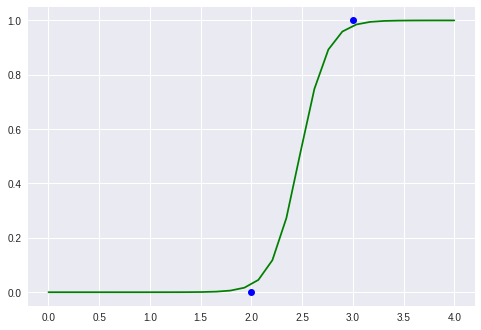

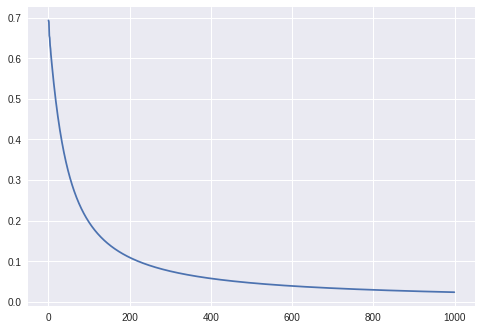

In [0]:
Jlist = []
x = [2,3]
y = [0,1]

def h(xi, theta):
  xi = np.matrix(xi)
  return 1/(1 + 1/(np.exp(np.dot(xi,np.matrix(theta).T))))

def LR(x, y, theta = [0, 0], steps = 1000, alpha = 0.6):
  dt = theta.copy()
  N = len(y)
  o = np.matrix(np.ones(N))
  xM = np.hstack((o.T, np.matrix(x).T))
  
  for i in range(steps):
    J = -1/(N) * sum((y[i]*np.log(h(xM[i],theta)) + (1 - y[i]) * np.log(1 - h(xM[i],theta))) for i in range(N))
    J = J.item(0)
    Jlist.append(J)
    for j in range(N):
      dt[j] = theta[j] - alpha * sum((h(xM[k],theta).item(0) - y[k])*xM[k].item(j) for k in range(N))
    theta = dt
    
  return theta

theta = LR(x, y)
print(theta)
plt.plot(x, y, 'ob');
smooth_x = np.linspace(0,4,30)
p = theta[1] * smooth_x + theta[0]
plt.plot(smooth_x, 1/(1+np.exp(-p)), 'g');
plt.show()
plt.plot(Jlist);

In [0]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
y_hat = list(LogReg.predict(X_test))
y = list(y_test)
print(accuracy_score(y, y_hat))
print(roc_auc_score(y, y_hat))

0.7608008429926238
0.7615764203787676


# -------------------------------------- SVD ------------------------------------------------

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/churn-data/master/train.csv")
df = df.drop(['id', 'phone', 'area_code', 'state'], axis = 1)

# convert 'yes', 'no' to 1, 0
df = df.applymap(lambda x: 1 if x == 'yes' else x)
df = df.applymap(lambda x: 0 if x == 'no' else x)

# replace '?' with column median
for c in df.columns:
  df[c] = df[c].replace('?', np.median([float(x)  for x in list(df[c].values) if str(x).isnumeric()]))

y = df['churn']
df = df.iloc[:,:-1]

df = df.apply(pd.to_numeric)  

# -------------------------- FOREST ----------------------
def forest(features, trees, c):
  # Set up our RandomForestClassifier instance and fit to data
  clf = RandomForestClassifier(n_estimators = trees, max_features = features)
  clf.fit(train[cols], train[str(c)])
#   clf.fit(X_train, y_train)

  # Make predictions
  predictions = clf.predict(test[cols])
  probs = clf.predict_proba(test[cols])
#   display(predictions)

  score = clf.score(test[cols], test[str(c)])
#   score = roc_auc_score(list(y_test.values), predictions)
  return score
# --------------------------------------------------------


for c in [df.shape[1]-1]:
  m = df.as_matrix()
  model = PCA(n_components = c)
  pts = normalize(m)
  model.fit(pts)
  pts2 = model.transform(pts)

  m = pd.DataFrame(pts2)
  m[str(c)] = y
  l = [str(i) for i in range(c+1)]
  m.columns = l

  # split data into train and test sets
  train, test = train_test_split(m, test_size = 0.30, random_state = 8)

  cols = l[:-1]

  # -------------------- predict --------------------

  max_a = 0
  max_i = 0
  for i in np.linspace(0.1,1,10):
    score = forest(i, 30, c)
    print(round(i,1),' Accuracy: ', score)
    if score > max_a:
      max_a = score
      max_i = i
  print(round(max_i,2), ': ', max_a)

0.1  Accuracy:  0.8695652173913043
0.2  Accuracy:  0.8800599700149925
0.3  Accuracy:  0.8995502248875562
0.4  Accuracy:  0.8995502248875562
0.5  Accuracy:  0.904047976011994
0.6  Accuracy:  0.9055472263868066
0.7  Accuracy:  0.9025487256371814
0.8  Accuracy:  0.9010494752623688
0.9  Accuracy:  0.9100449775112444
1.0  Accuracy:  0.9025487256371814
0.9 :  0.9100449775112444


In [0]:
train = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/churn-data/master/train.csv")
train = train.drop(['phone', 'area_code', 'state'], axis = 1)
test = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/churn-data/master/test.csv")
test = test.drop(['phone', 'area_code', 'state'], axis = 1)

# convert 'yes', 'no' to 1, 0
train = train.applymap(lambda x: 1 if x == 'yes' else x)
train = train.applymap(lambda x: 0 if x == 'no' else x)
test = test.applymap(lambda x: 1 if x == 'yes' else x)
test = test.applymap(lambda x: 0 if x == 'no' else x)


# replace '?' with column median
for c in train.columns:
  train[c] = train[c].replace('?', np.median([float(x)  for x in list(train[c].values) if str(x).isnumeric()]))
  
for c in test.columns:
  test[c] = test[c].replace('?', np.median([float(x)  for x in list(test[c].values) if str(x).isnumeric()]))

y_train = train[['id', 'churn']]
y_test = test[['id', 'churn']] # ------------------ 9999 -----------------------

train = train.apply(pd.to_numeric)  
test = test.apply(pd.to_numeric)  

train = train.iloc[:,1:-1]
test = test.iloc[:,1:-1]

m = train.append(test)

# ----------------------------------------------------

c = int(train.shape[1])

model = PCA(n_components = c)

m = m.as_matrix()
pts = normalize(m)
model.fit(pts)
pts2 = model.transform(pts)

m = pd.DataFrame(pts2)

train = m[:2222]
test = m[2222:]

train = train.join(y_train['churn'])

cols = [str(i) for i in range(c)]
test.columns = cols

train.columns = [str(i) for i in range(c+1)]
test.columns = [str(i) for i in range(c)]

# -------------------- predict --------------------

# Set up our RandomForestClassifier instance and fit to data
clf = RandomForestClassifier(n_estimators = 30, max_features = 0.5);
clf.fit(train[cols], train[str(train.shape[1]-1)]);

# # Make predictions
predictions = clf.predict(test[cols])
probs = clf.predict_proba(test[cols])

print(list(predictions))

# print(train['18'])
test.head()

[0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
2222,-0.056152,-0.118059,0.050053,-0.049003,-0.074915,-0.030853,0.036444,-0.011957,-0.000619,0.003930,0.000022,-0.001366,0.000067,0.000603,-0.000224,-0.000006,-0.000927
2223,0.296989,0.181179,0.086441,0.149804,-0.016892,0.047362,-0.022113,0.040770,0.011935,-0.008906,-0.000014,0.001305,-0.000018,-0.001243,-0.000252,-0.000287,0.000066
2224,-0.001216,0.088829,-0.034879,0.141125,-0.060800,-0.021191,-0.023457,-0.020716,0.003920,-0.003679,-0.000454,0.006339,-0.000184,-0.000370,-0.000163,-0.000162,0.000050
2225,0.081930,-0.072494,-0.128175,-0.115588,-0.009499,-0.029222,-0.016527,0.005860,0.012253,-0.000679,0.000813,-0.001242,0.000075,0.000793,-0.000156,-0.000313,0.000016
2226,-0.064773,0.142823,0.023315,0.028219,-0.041494,0.112979,-0.022862,-0.010605,-0.002161,0.000566,-0.000407,0.000759,-0.000307,-0.000187,-0.000200,0.000028,0.000018


In [0]:
predict = pd.DataFrame(predictions)
y_test['churn'] = predict

y_test.head()

,id,churn
0,221,0
1,1313,0
2,1635,1
3,289,0
4,2416,0


In [0]:
from google.colab import files
y_test.to_csv('predictions.csv', index = False)
files.download('predictions.csv')

In [0]:
from collections import Counter

from sklearn.datasets import load_iris
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

from imblearn.datasets import make_imbalance
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced

print(__doc__)

RANDOM_STATE = 42

# Create a folder to fetch the dataset
iris = load_iris()
X, y = make_imbalance(iris.data, iris.target, ratio={0: 25, 1: 50, 2: 50},
                      random_state=0)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=RANDOM_STATE)

print('Training target statistics: {}'.format(Counter(y_train)))
print('Testing target statistics: {}'.format(Counter(y_test)))

# Create a pipeline
pipeline = make_pipeline(NearMiss(version=2, random_state=RANDOM_STATE),
                         LinearSVC(random_state=RANDOM_STATE))
pipeline.fit(X_train, y_train)

# Classify and report the results
print(classification_report_imbalanced(y_test, pipeline.predict(X_test)))

Automatically created module for IPython interactive environment
Training target statistics: Counter({1: 38, 2: 38, 0: 17})
Testing target statistics: Counter({1: 12, 2: 12, 0: 8})
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00         8
          1       1.00      0.83      1.00      0.91      0.91      0.82        12
          2       0.86      1.00      0.90      0.92      0.95      0.91        12

avg / total       0.95      0.94      0.96      0.94      0.95      0.90        32



# ------------------------------------ SMOTE ------------------------------------

In [0]:
!pip install imblearn

from collections import Counter
from imblearn.datasets import fetch_datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import numpy as np

    100% |████████████████████████████████| 153kB 4.9MB/s 


In [0]:
# ----------------------------------------------- PREP --------------------------------------------------------------------
df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/churn-data/master/train.csv")
df = df.drop(['id', 'phone', 'area_code', 'state'], axis = 1)

# convert 'yes', 'no' to 1, 0
df = df.applymap(lambda x: 1 if x == 'yes' else x)
df = df.applymap(lambda x: 0 if x == 'no' else x)

# replace '?' with column median
for c in df.columns:
  df[c] = df[c].replace('?', np.median([float(x)  for x in list(df[c].values) if str(x).isnumeric()]))

df = df.apply(pd.to_numeric)  

cols = list(df.columns)[:-1]

# splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(df[cols], df['churn'], random_state=2)
# --------------------------------------------------------------------------------------------------------------------------

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1666, 17)
(556, 17)
(1666,)
(556,)


In [0]:
# ----------------------------------------------- TEST ---------------------------------------------------------------------
trainK = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/churn-data/master/train.csv")
trainK = trainK.drop(['id', 'phone', 'area_code', 'state'], axis = 1)
testK = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/churn-data/master/test.csv")
ids = testK['id'].copy()
testK = testK.drop(['id', 'phone', 'area_code', 'state'], axis = 1)

# convert 'yes', 'no' to 1, 0
trainK = trainK.applymap(lambda x: 1 if x == 'yes' else x)
trainK = trainK.applymap(lambda x: 0 if x == 'no' else x)
testK = testK.applymap(lambda x: 1 if x == 'yes' else x)
testK = testK.applymap(lambda x: 0 if x == 'no' else x)

# replace '?' with column median
for c in trainK.columns:
  trainK[c] = trainK[c].replace('?', np.median([float(x)  for x in list(trainK[c].values) if str(x).isnumeric()]))
  
for c in testK.columns:
  testK[c] = testK[c].replace('?', np.median([float(x)  for x in list(testK[c].values) if str(x).isnumeric()]))
  
cols = list(trainK.columns)[:-1]

# splitting data into training and test set
X_train, X_test, y_train, y_test = trainK[cols], testK[cols], trainK['churn'], testK['churn']
# --------------------------------------------------------------------------------------------------------------------------

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2222, 17)
(1111, 17)
(2222,)
(1111,)


In [0]:
def print_results(headline, true_value, pred):
    print(headline)
    print("accuracy: {}".format(accuracy_score(true_value, pred)))
    print("precision: {}".format(precision_score(true_value, pred)))
    print("recall: {}".format(recall_score(true_value, pred)))
    print("f1: {}".format(f1_score(true_value, pred)))


# our classifier to use
classifier = RandomForestClassifier

# build model with SMOTE imblearn
smote_pipeline = make_pipeline_imb(SMOTE(random_state=4), classifier(random_state=42))
smote_model = smote_pipeline.fit(X_train, y_train)
smote_prediction = smote_model.predict(X_test)

# # print information about model
X_smote, y_smote = SMOTE().fit_sample(df[cols], df['churn'])
print("SMOTE data distribution: {}".format(Counter(y_smote)))
print('SMOTE Pipeline Score {}'.format(smote_pipeline.score(X_test, y_test)))
print_results("SMOTE classification", y_test, smote_prediction)

# c = 0
# for i in range(len(smote_prediction)):
#   if smote_prediction[i] == y_test.values[i]: c+=1
    
# print()
# print(c/len(smote_prediction))

# print(smote_prediction.shape)

c = 0
for i in range(len(list(y_test.values))):
  if list(smote_prediction)[i] == list(y_test.values)[i]: c += 1
print(c/len(list(y_test.values)))
roc_auc_score(list(y_test.values), list(smote_prediction))

SMOTE data distribution: Counter({0: 1897, 1: 1897})
SMOTE Pipeline Score 0.9334532374100719
SMOTE classification
accuracy: 0.9334532374100719
precision: 0.75
recall: 0.6716417910447762
f1: 0.7086614173228347
0.9334532374100719


0.8204834722095046

In [0]:
ids = pd.DataFrame(ids)
predict = pd.DataFrame(smote_prediction)
ids['churn'] = predict

(1111, 1)
(1111, 1)
(1111, 2)
(1111, 1)


In [0]:
from google.colab import files
ids.to_csv('smote.csv', index = False)
files.download('smote.csv')

# ----------------------- KERAS ----------------------------

In [0]:
# Importing the dataset
df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/churn-data/master/train.csv")

# Splitting the dataset into the Training set and Test set

# ----------------------------------------------- PREP --------------------------------------------------------------------
df = df.drop(['id', 'phone', 'area_code', 'state'], axis = 1)

# convert 'yes', 'no' to 1, 0
df = df.applymap(lambda x: 1 if x == 'yes' else x)
df = df.applymap(lambda x: 0 if x == 'no' else x)

# replace '?' with column median
for c in df.columns:
  df[c] = df[c].replace('?', np.median([float(x)  for x in list(df[c].values) if str(x).isnumeric()]))

df = df.apply(pd.to_numeric)  

cols = list(df.columns)[:-1]

# splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(df[cols], df['churn'], random_state=2)
# --------------------------------------------------------------------------------------------------------------------------

# # ----------------------------------------------- TEST ---------------------------------------------------------------------
# trainK = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/churn-data/master/train.csv")
# trainK = trainK.drop(['id', 'phone', 'area_code', 'state'], axis = 1)
# testK = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/churn-data/master/test.csv")
# ids = testK['id'].copy()
# testK = testK.drop(['id', 'phone', 'area_code', 'state'], axis = 1)

# # convert 'yes', 'no' to 1, 0
# trainK = trainK.applymap(lambda x: 1 if x == 'yes' else x)
# trainK = trainK.applymap(lambda x: 0 if x == 'no' else x)
# testK = testK.applymap(lambda x: 1 if x == 'yes' else x)
# testK = testK.applymap(lambda x: 0 if x == 'no' else x)

# # replace '?' with column median
# for c in trainK.columns:
#   trainK[c] = trainK[c].replace('?', np.median([float(x)  for x in list(trainK[c].values) if str(x).isnumeric()]))
  
# for c in testK.columns:
#   testK[c] = testK[c].replace('?', np.median([float(x)  for x in list(testK[c].values) if str(x).isnumeric()]))
  
# cols = list(trainK.columns)[:-1]

# # splitting data into training and test set
# X_train, X_test, y_train, y_test = trainK[cols], testK[cols], trainK['churn'], testK['churn']
# # --------------------------------------------------------------------------------------------------------------------------

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Importing Keras
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
#---------------------------------doesn't work...------------------------
# Function to create model, required for KerasClassifier
def create_model():
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=17, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, verbose=1)
# define the grid search parameters
batch_size = [100]
epochs = [10]
param_grid = dict(batch_size=batch_size, epochs=epochs)
print('1')
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
print('2')
grid_result = grid.fit(X_train[:10], y_train[:10])
print('3')
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print('4')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
    

1
2
Epoch 1/10
Epoch 1/10


KeyboardInterrupt: ignored

In [0]:
#Initialising the ANN
classifier = Sequential()

# Add input layer and hidden layer no.1
# 6 output nodes, Relu activation function and 11 input nodes
# Output nodes is determined by the number of input nodes+1/2 (6)
# the uniform method makes sure the weights are given randomly with small numbers close to 0
classifier.add(Dense(output_dim = 9, init = 'uniform', activation = 'relu', input_dim = 17))

# Add the second hidden layer to achieve a deep neural network
classifier.add(Dense(output_dim = 9, init = 'uniform', activation = 'relu'))

# Add the Output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))


#Compiling the NN
# binary_crossentropy loss function used when a binary output is expected
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) 


classifier.fit(X_train, y_train, batch_size = 200, nb_epoch = 100)

# Fitting classifier to the Training set
# Create your classifier here

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Create a treshold to predict a true or false for leaving the
# the bank.
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test, y_pred)

In [0]:
l1 = [int(i) for i in y_pred.T[0]]
l2 = list(y_test.values)

c = 0
for i in range(len(l1)):
  if l1[i] == l2[i]: c += 1
    
print(c/len(l1))

roc_auc_score(l1, l2)

0.8794964028776978


0.7101593625498007

In [0]:
l1 = pd.DataFrame([int(i) for i in y_pred.T[0]])
ans['churn'] = l1
ans.columns = ['id', 'churn']

In [0]:
from google.colab import files
ans.to_csv('keras.csv', index = False)
files.download('keras.csv')

# ---------------------- MLP ------------------------

In [0]:
from sklearn.neural_network import MLPClassifier
from scipy.stats import mode

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/churn-data/master/train.csv")

# ----------------------------------------------- PREP --------------------------------------------------------------------
# df = df.drop(['id', 'phone', 'area_code', 'state'], axis = 1)
df = df[['day_mins', 'day_charge', 'custserv_calls', 'eve_charge', 'eve_mins', 'churn']]

# # convert 'yes', 'no' to 1, 0
# df = df.applymap(lambda x: 1 if x == 'yes' else x)
# df = df.applymap(lambda x: 0 if x == 'no' else x)

# replace '?' with column median
for c in df.columns:
  df[c] = df[c].replace('?', np.median([float(x)  for x in list(df[c].values) if str(x).isnumeric()]))

df = df.apply(pd.to_numeric)  

cols = list(df.columns)[:-1]

# splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(df[cols], df['churn'], random_state=2)
# --------------------------------------------------------------------------------------------------------------------------


# # ----------------------------------------------- TEST ---------------------------------------------------------------------
# trainK = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/churn-data/master/train.csv")
# trainK = trainK.drop(['id', 'phone', 'area_code', 'state'], axis = 1)
# testK = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/churn-data/master/test.csv")
# ids = testK['id'].copy()
# testK = testK.drop(['id', 'phone', 'area_code', 'state'], axis = 1)

# # convert 'yes', 'no' to 1, 0
# trainK = trainK.applymap(lambda x: 1 if x == 'yes' else x)
# trainK = trainK.applymap(lambda x: 0 if x == 'no' else x)
# testK = testK.applymap(lambda x: 1 if x == 'yes' else x)
# testK = testK.applymap(lambda x: 0 if x == 'no' else x)

# # replace '?' with column median
# for c in trainK.columns:
#   trainK[c] = trainK[c].replace('?', np.median([float(x)  for x in list(trainK[c].values) if str(x).isnumeric()]))
  
# for c in testK.columns:
#   testK[c] = testK[c].replace('?', np.median([float(x)  for x in list(testK[c].values) if str(x).isnumeric()]))
  
# trainK = trainK.apply(pd.to_numeric)
# testK = testK.apply(pd.to_numeric)
# cols = list(trainK.columns)[:-1]

# # splitting data into training and test set
# X_train, X_test, y_train, y_test = trainK[cols], testK[cols], trainK['churn'], testK['churn']
# # --------------------------------------------------------------------------------------------------------------------------

mlp = MLPClassifier(hidden_layer_sizes=(3))

mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print()
print(classification_report(y_test,predictions))

X_train.head()

c = 0
for i in range(len(list(y_test.values))):
  if list(predictions)[i] == list(y_test.values)[i]: c += 1
print(c/len(list(y_test.values)))
roc_auc_score(list(y_test.values), list(predictions))

[[476  13]
 [ 65   2]]

             precision    recall  f1-score   support

          0       0.88      0.97      0.92       489
          1       0.13      0.03      0.05        67

avg / total       0.79      0.86      0.82       556

0.8597122302158273


0.5016329395964961